# TENSERFLOW & PYTORCH

In [1]:
!pip install IPython 
from IPython.display import Image  # 주피터 노트북에 이미지 삽입

#### Define and Run vs Define by Run 

Define and Run의 특징을 가지는 TensorFlow의 경우,
실행할 계산에 관련된 그래프(computational graph)를 미리 다 정의하여 올려놓고
그래프에 투입될 데이터들을 집어넣어 연산을 수행하는 방식입니다.
따라서 한번 실행이 된 상태에서 에러가 나면 찾기가 힘듭니다.(production 부분(실제 제품 개발)에서 큰 강점을 가짐)
 
반면 Define by Run(DCG, dynamic computational graph)의 특성을 가지고 있는 PyTorch의 경우,
연산이 이루어지는 시점에서 동적으로 그래프를 만들어 연산을 수행하기 때문에
조금 더 낮은 단위의 연산들로 구성 할 수 있게 되고
<b> 디버깅 </b> 및 구조 설계의 세분화가(아이디어&논문구현) 가능해집니다.

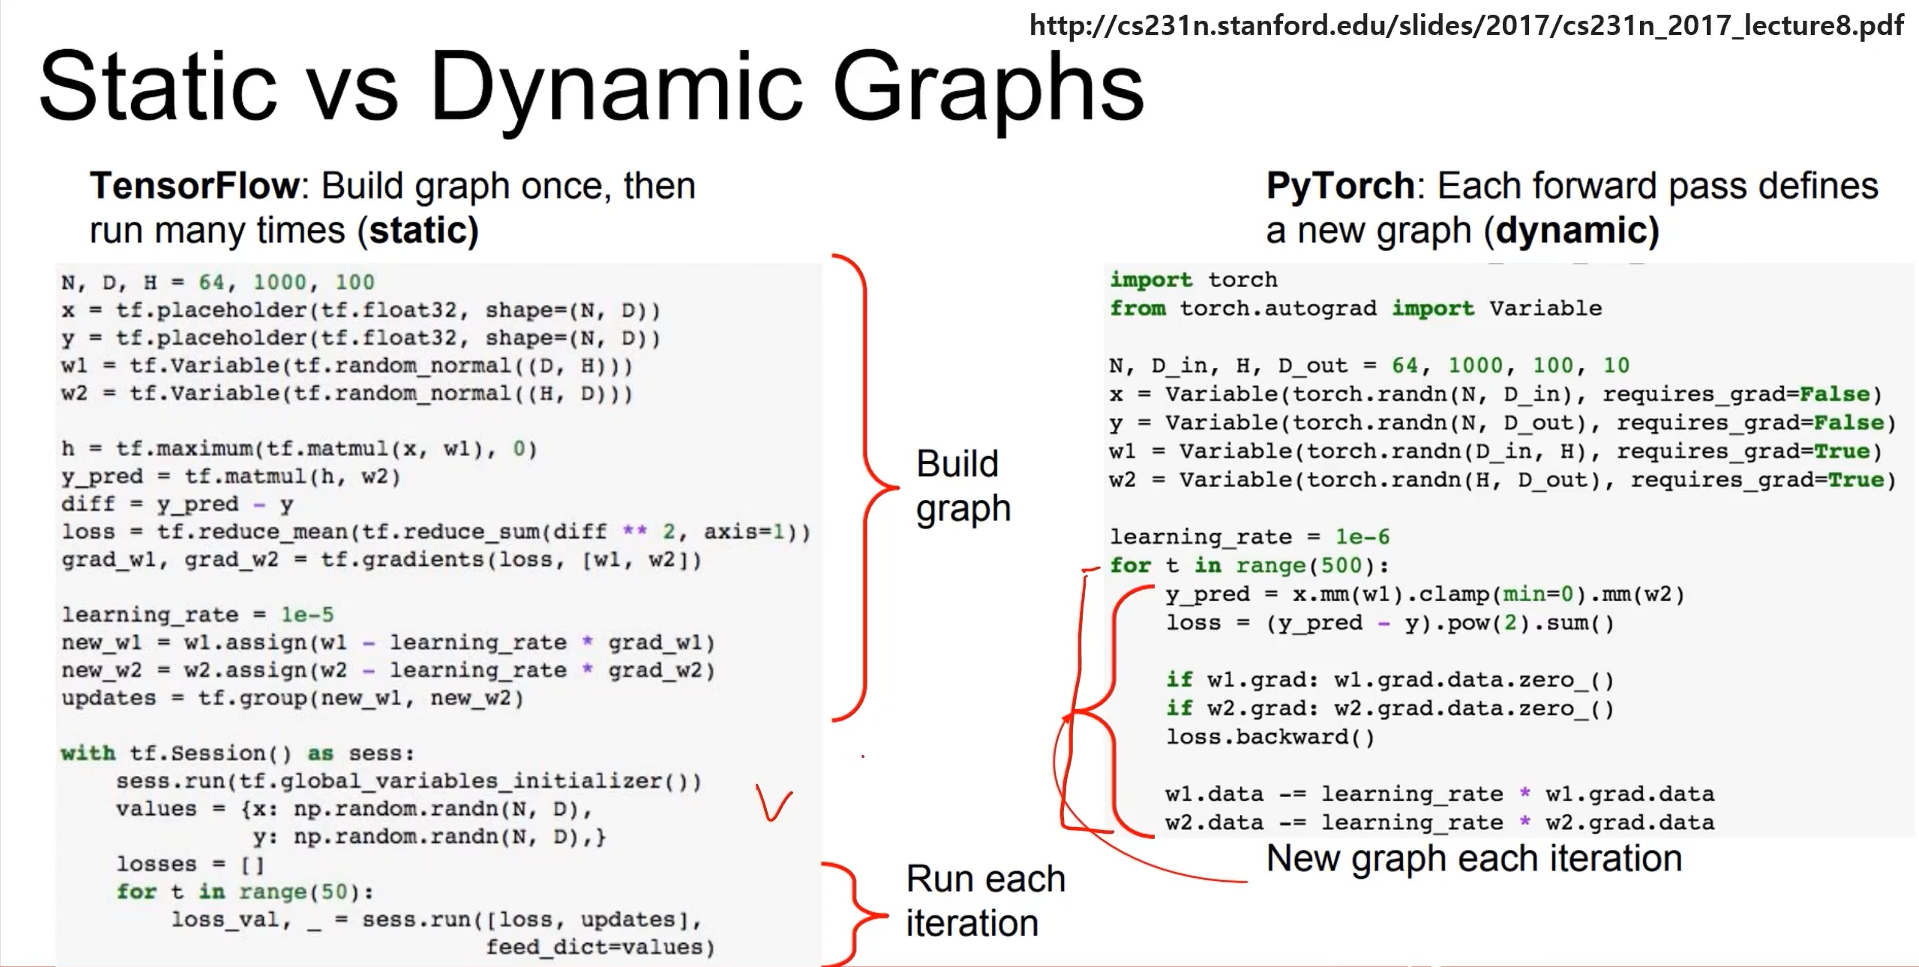

In [2]:
Image("img/static&dynamic.png")

### Pytorch = Numpy + AutoGrad + Function

Tensor == 다차원 Array를 표현하는 클래스 \
numpy의 ndarray랑 거의 동일(tensorflow의 tensor)

In [3]:
import numpy as np

In [4]:
n_array = np.arange(10).reshape(2,5)
print(n_array)
print("ndim:", n_array.ndim, "shape:", n_array.shape)

[[0 1 2 3 4]
 [5 6 7 8 9]]
ndim: 2 shape: (2, 5)


In [5]:
import torch
t_array = torch.FloatTensor(n_array)
print(t_array)
print("ndim: ", t_array.ndim, "shape:", t_array.shape)

tensor([[0., 1., 2., 3., 4.],
        [5., 6., 7., 8., 9.]])
ndim:  2 shape: torch.Size([2, 5])


In [6]:
data = [[3,5], [10, 5]]
x_data = torch.tensor(data)
x_data

tensor([[ 3,  5],
        [10,  5]])

torch의 tensor가 담을 수 있는 data type은 numpy와 동일
(int, float, double, bit vomplex, blool 등등)

In [7]:
data = [[3,5,20], [10, 5, 50], [1, 5, 10]]
x_data = torch.tensor(data)

In [8]:
x_data[1:]

tensor([[10,  5, 50],
        [ 1,  5, 10]])

In [9]:
x_data[1,2]

tensor(50)

In [10]:
x_data[:2, 1:]

tensor([[ 5, 20],
        [ 5, 50]])

In [11]:
x_data.flatten()

tensor([ 3,  5, 20, 10,  5, 50,  1,  5, 10])

In [12]:
torch.ones_like(x_data)

tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]])

In [13]:
x_data.numpy()

array([[ 3,  5, 20],
       [10,  5, 50],
       [ 1,  5, 10]], dtype=int64)

In [14]:
x_data.shape

torch.Size([3, 3])

In [15]:
x_data.dtype

torch.int64

pytorch의 tensor는 gpu에 올려서 사용가능

In [16]:
x_data.device

device(type='cpu')

In [17]:
if torch.cuda.is_available():
    print("true")
    x_data_cuda = x_data.to('cuda')

## Tesor handling
- view: reshape과 동일하게 tensor의 shape을 변환(차원 변환)
  (-1인 경우 동일하게 원래 배열의 길이와 남은 차원으로 추정(알아서 결정)) \
  (https://yganalyst.github.io/data_handling/memo_5/)
- squeeze: 차원의 개수가 1인 차원을 삭제 (압축)
- unsqueeze: 차원의 개수가 1인 차원을 추가

In [18]:
tensor_ex = torch.rand(size=(2, 3, 2))
tensor_ex

tensor([[[0.2715, 0.0575],
         [0.5182, 0.5833],
         [0.6626, 0.8234]],

        [[0.7130, 0.3217],
         [0.6101, 0.0509],
         [0.5275, 0.9038]]])

In [19]:
tensor_ex.view([-1, 6])

tensor([[0.2715, 0.0575, 0.5182, 0.5833, 0.6626, 0.8234],
        [0.7130, 0.3217, 0.6101, 0.0509, 0.5275, 0.9038]])

In [20]:
tensor_ex.reshape([-1,6])

tensor([[0.2715, 0.0575, 0.5182, 0.5833, 0.6626, 0.8234],
        [0.7130, 0.3217, 0.6101, 0.0509, 0.5275, 0.9038]])

### view와 reshape은 contiguity 보장의 차이(메모리 연속성 보장)

- view: contiguous 보장할때 사용
- reshpae: 보장하지 않는 경우에도 사용 가능
https://jimmy-ai.tistory.com/122


In [21]:
a = torch.zeros(3, 2)
b = a.view(2, 3)
a.fill_(1)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])

In [22]:
a

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])

In [23]:
b

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [24]:
a = torch.zeros(3, 2)
b = a.t().reshape(6)
a.fill_(1)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])

In [25]:
a

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])

In [26]:
b

tensor([0., 0., 0., 0., 0., 0.])

### TENSOR squeeze & unsqueeze
squeeze - squeeze함수는 차원이 1인 차원을 제거해줍니다. 따로 차원을 설정하지 않으면 1인 차원을 모두 제거합니다. 그리고 차원을 설정해주면 그 차원만 제거합니다. \
unsqueeze - 차원을 1 추가

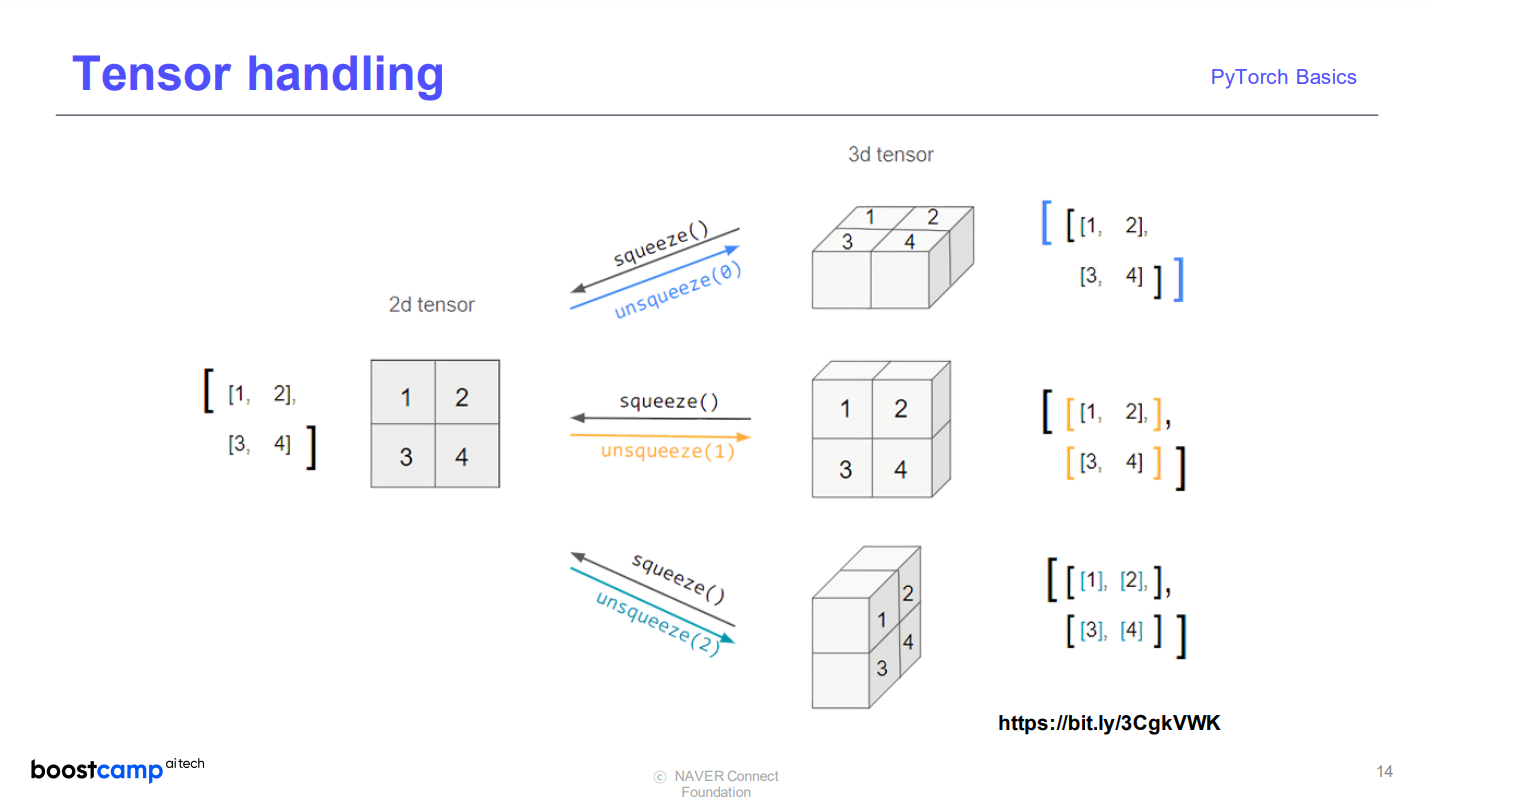

In [27]:
Image("img/squeeze_unsqueeze.png")

In [30]:
tensor_ex = torch.rand(size=(2, 1, 2))

In [31]:
tensor_ex

tensor([[[0.0398, 0.7745]],

        [[0.5077, 0.2618]]])

In [32]:
tensor_ex.squeeze()

tensor([[0.0398, 0.7745],
        [0.5077, 0.2618]])

In [33]:
tensor_ex = torch.rand(size=(2, 2))

In [34]:
tensor_ex

tensor([[0.9362, 0.7316],
        [0.0740, 0.8575]])

In [35]:
tensor_ex.unsqueeze(0).shape

torch.Size([1, 2, 2])

In [36]:
tensor_ex.unsqueeze(1).shape

torch.Size([2, 1, 2])

### Tensor oprerations

행렬곱셈 연산은 함수는 dot이 아닌 mm 사용

In [42]:
n1 = np.arange(10).reshape(2,5)
t1 = torch.FloatTensor(n1)
t1

tensor([[0., 1., 2., 3., 4.],
        [5., 6., 7., 8., 9.]])

In [43]:
n2 = np.arange(10).reshape(5,2)
t2 = torch.FloatTensor(n2)
t2

tensor([[0., 1.],
        [2., 3.],
        [4., 5.],
        [6., 7.],
        [8., 9.]])

In [41]:
t1.mm(t2)

tensor([[ 60.,  70.],
        [160., 195.]])

In [44]:
t1.dot(t2)

RuntimeError: 1D tensors expected, but got 2D and 2D tensors

In [45]:
t1.matmul(t2)

tensor([[ 60.,  70.],
        [160., 195.]])

 배열 A의 차원이 (2,3,4)인 경우, matmul은 배열 A를 (3x4)행렬을 2개 갖고 있는 것으로 간주함

In [47]:
a = torch.rand(5, 2, 3)
b = torch.rand(5)
a.mm(b)

RuntimeError: self must be a matrix

3차원 배열과 1차원을 곱하고 있기에 불가

In [48]:
a = torch.rand(5, 2, 3)
b = torch.rand(3)
a.matmul(b)

tensor([[0.6352, 0.8953],
        [0.4015, 0.7110],
        [0.3944, 0.4063],
        [0.2938, 0.5602],
        [0.8183, 0.8288]])

In [49]:
a[0].mm(torch.unsqueeze(b,1))

tensor([[0.6352],
        [0.8953]])

## nn.functional 모듈

In [50]:
import torch
import torch.nn.functional as F
tensor = torch.FloatTensor([0.5, 0.7, 0.1])
h_tensor = F.softmax(tensor, dim=0)
h_tensor
# tensor([0.3458, 0.4224, 0.2318])

tensor([0.3458, 0.4224, 0.2318])

softmax, argmax등을 지원

## AutoGrad
pyTorch의 핵심은 자동 미분의 지원 → backward 함수 사용

In [53]:
w = torch.tensor(2.0,
requires_grad=True)
y = w**2
z = 10*y + 2
z.backward()
w.grad

tensor(40.)

In [54]:
a = torch.tensor([2., 3.], requires_grad=True)
b = torch.tensor([6., 4.], requires_grad=True)
Q = 3*a**3 - b**2
external_grad = torch.tensor([1., 1.])
Q.backward(gradient=external_grad)

In [55]:
a.grad

tensor([36., 81.])

In [56]:
b.grad

tensor([-12.,  -8.])